In [1]:
import pandas as pd

In [2]:
# Data Collection
df = pd.read_csv("CGU_Dataset-7.csv")
# Display the first few rows of the dataset to inspect its structure and content.
print("First 5 rows of the dataset:-\n", df.head())

First 5 rows of the dataset:-
    id  LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  \
0   1         16            19           0                     0   
1   2          9            13           2                     0   
2   3          2             3           0                     0   
3   5          1             3           1                     1   
4  11         19            13           3                    11   

   LOC_COMMENTS  CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
0            22               30                     10                0.20   
1            14               28                      7                0.23   
2             0                4                      2                0.25   
3             0                4                      2                0.13   
4            19               24                      7                0.10   

   DECISION_COUNT  ...  NODE_COUNT  NORMALIZED_CYLOMATIC_COMPLEXITY  \
0             

In [3]:
# Check the dimensions of the dataset (number of rows and columns).
row, col = df.shape
print("No. of rows in the dataset: ", row)
print("No. of column in the dataset: ", col)

No. of rows in the dataset:  125
No. of column in the dataset:  41


In [4]:
# Display the number of missing values in each column
missingValues = df.isnull().sum()
print("Missing values per column:-")
print(missingValues)

Missing values per column:-
id                                 0
LOC_BLANK                          0
BRANCH_COUNT                       0
CALL_PAIRS                         0
LOC_CODE_AND_COMMENT               0
LOC_COMMENTS                       0
CONDITION_COUNT                    0
CYCLOMATIC_COMPLEXITY              0
CYCLOMATIC_DENSITY                 0
DECISION_COUNT                     0
DECISION_DENSITY                   0
DESIGN_COMPLEXITY                  0
DESIGN_DENSITY                     0
EDGE_COUNT                         0
ESSENTIAL_COMPLEXITY               0
ESSENTIAL_DENSITY                  0
LOC_EXECUTABLE                     0
PARAMETER_COUNT                    0
GLOBAL_DATA_COMPLEXITY             0
GLOBAL_DATA_DENSITY                0
HALSTEAD_CONTENT                   0
HALSTEAD_DIFFICULTY                0
HALSTEAD_EFFORT                    0
HALSTEAD_ERROR_EST                 0
HALSTEAD_LENGTH                    0
HALSTEAD_LEVEL                     0
HALSTEAD_P

In [5]:
# Identify the data types of each column (numeric, categorical, text, etc.).
print("Data types of each column:\n", df.dtypes)

Data types of each column:
 id                                   int64
LOC_BLANK                            int64
BRANCH_COUNT                         int64
CALL_PAIRS                           int64
LOC_CODE_AND_COMMENT                 int64
LOC_COMMENTS                         int64
CONDITION_COUNT                      int64
CYCLOMATIC_COMPLEXITY                int64
CYCLOMATIC_DENSITY                 float64
DECISION_COUNT                       int64
DECISION_DENSITY                   float64
DESIGN_COMPLEXITY                    int64
DESIGN_DENSITY                     float64
EDGE_COUNT                           int64
ESSENTIAL_COMPLEXITY                 int64
ESSENTIAL_DENSITY                  float64
LOC_EXECUTABLE                       int64
PARAMETER_COUNT                      int64
GLOBAL_DATA_COMPLEXITY               int64
GLOBAL_DATA_DENSITY                float64
HALSTEAD_CONTENT                   float64
HALSTEAD_DIFFICULTY                float64
HALSTEAD_EFFORT           

In [6]:
# Finding Unique categories of CLASS column
print("Class: ", df['CLASS'].unique())

Class:  ['N' 'Y']


In [7]:
# Mapping with integer values
df['CLASS'] = df['CLASS'].map({'N': 0, 'Y': 1})
print("Checking Dataset after mapping:-\n", df.head())

Checking Dataset after mapping:-
    id  LOC_BLANK  BRANCH_COUNT  CALL_PAIRS  LOC_CODE_AND_COMMENT  \
0   1         16            19           0                     0   
1   2          9            13           2                     0   
2   3          2             3           0                     0   
3   5          1             3           1                     1   
4  11         19            13           3                    11   

   LOC_COMMENTS  CONDITION_COUNT  CYCLOMATIC_COMPLEXITY  CYCLOMATIC_DENSITY  \
0            22               30                     10                0.20   
1            14               28                      7                0.23   
2             0                4                      2                0.25   
3             0                4                      2                0.13   
4            19               24                      7                0.10   

   DECISION_COUNT  ...  NODE_COUNT  NORMALIZED_CYLOMATIC_COMPLEXITY  \
0          

In [8]:
# Split the dataset into independent and dependent feature:
X = df.drop('CLASS', axis=1)  # Features (all columns except 'CLASS')
y = df['CLASS']  # CLASS column 

In [9]:
X.head(5)

,id,LOC_BLANK,BRANCH_COUNT,CALL_PAIRS,LOC_CODE_AND_COMMENT,LOC_COMMENTS,CONDITION_COUNT,CYCLOMATIC_COMPLEXITY,CYCLOMATIC_DENSITY,DECISION_COUNT,...,MULTIPLE_CONDITION_COUNT,NODE_COUNT,NORMALIZED_CYLOMATIC_COMPLEXITY,NUM_OPERANDS,NUM_OPERATORS,NUM_UNIQUE_OPERANDS,NUM_UNIQUE_OPERATORS,NUMBER_OF_LINES,PERCENT_COMMENTS,LOC_TOTAL
0,1,16,19,0,0,22,30,10,0.20,12,...,15,23,0.11,70,121,11,13,90,30.56,50
1,2,9,13,2,0,14,28,7,0.23,14,...,14,23,0.13,44,55,23,19,55,31.82,30
2,3,2,3,0,0,0,4,2,0.25,2,...,2,7,0.17,17,17,7,6,12,0.00,8
3,5,1,3,1,1,0,4,2,0.13,2,...,2,7,0.11,12,19,8,10,18,6.67,15
4,11,19,13,3,11,19,24,7,0.10,12,...,12,30,0.06,215,224,73,17,108,34.48,68


In [10]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: CLASS, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets(70% training, 30%testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler
# Scale the input features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.decomposition import PCA
# Apply PCA on the training data
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the test data using the same PCA model
X_test_pca = pca.transform(X_test_scaled)


In [14]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, matthews_corrcoef

def calculate_metrics(y_test, y_predict):
    metrics = {}

    # Calculate metrics
    metrics['accuracy'] = accuracy_score(y_test, y_predict)

    conf_matrix = confusion_matrix(y_test, y_predict)
    tn, fp, fn, tp = conf_matrix.ravel()

    metrics['sensitivity'] = tp / (tp + fn) if (tp + fn) != 0 else 0
    metrics['specificity'] = tn / (tn + fp) if (tn + fp) != 0 else 0
    metrics['precision'] = tp / (tp + fp) if (tp + fp) != 0 else 0
    metrics['f1_score'] = 2 * (metrics['precision'] * metrics['sensitivity']) / (metrics['precision'] + metrics['sensitivity']) if (metrics['precision'] + metrics['sensitivity']) != 0 else 0
    metrics['mcc'] = matthews_corrcoef(y_test, y_predict)
    
    # Confusion Matrix and Classification Report
    metrics['confusion_matrix'] = conf_matrix
    metrics['classification_report'] = classification_report(y_test, y_predict)

    # Print the results
    print(f'Accuracy: {metrics["accuracy"]}')
    print(f'Sensitivity: {metrics["sensitivity"]}')
    print(f'Specificity: {metrics["specificity"]}')
    print(f'Precision: {metrics["precision"]}')
    print(f'F1-Score: {metrics["f1_score"]}')
    print(f'Matthews Correlation Coefficient: {metrics["mcc"]}')
    return metrics



In [15]:
#*************************************LOGISTIC REGRESSION*****************************

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, matthews_corrcoef
# Create a Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
# Train the model on the training data
logistic_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_logistic = logistic_model.predict(X_test_scaled)
metrics_dict_logistic = calculate_metrics(y_test, y_pred_logistic)

Accuracy: 0.7631578947368421
Sensitivity: 0.6363636363636364
Specificity: 0.8148148148148148
Precision: 0.5833333333333334
F1-Score: 0.6086956521739131
Matthews Correlation Coefficient: 0.440199228125206


In [16]:
#***********LOGISTIC REGRESSION WITH PCA*************
logistic_model.fit(X_train_pca, y_train)
# Make predictions on the test data
y_pred_logistic1 = logistic_model.predict(X_test_pca)
# Calculate metrics
print(f'**************Metrics After applying PCA*****************')
metrics_dict_logistic1 = calculate_metrics(y_test, y_pred_logistic1)

**************Metrics After applying PCA*****************
Accuracy: 0.7894736842105263
Sensitivity: 0.45454545454545453
Specificity: 0.9259259259259259
Precision: 0.7142857142857143
F1-Score: 0.5555555555555556
Matthews Correlation Coefficient: 0.44511307522757965


In [17]:
#****************KNN************************
from sklearn.neighbors import KNeighborsClassifier
# Create a KNN model (adjust the value of k as needed)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the model on the training data
knn_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_knn = knn_model.predict(X_test_scaled)

# Calculate metrics
metrics_dict_knn = calculate_metrics(y_test, y_pred_knn)

Accuracy: 0.7894736842105263
Sensitivity: 0.6363636363636364
Specificity: 0.8518518518518519
Precision: 0.6363636363636364
F1-Score: 0.6363636363636364
Matthews Correlation Coefficient: 0.4882154882154882


In [18]:
###****************KNN WITH PCA*************
knn_model.fit(X_train_pca, y_train)
# Make predictions on the test data
y_pred_knn1 = knn_model.predict(X_test_pca)
# Calculate metrics
print(f'**************Metrics After applying PCA*****************')
metrics_dict_knn1 = calculate_metrics(y_test, y_pred_knn1)

**************Metrics After applying PCA*****************
Accuracy: 0.7631578947368421
Sensitivity: 0.6363636363636364
Specificity: 0.8148148148148148
Precision: 0.5833333333333334
F1-Score: 0.6086956521739131
Matthews Correlation Coefficient: 0.440199228125206


In [19]:
#********************SVM***************************************
from sklearn.svm import SVC
# Create SVM models with different kernels
svm_linear = SVC(kernel='linear', random_state=42)
svm_poly = SVC(kernel='poly', degree=3, random_state=42)  
svm_rbf = SVC(kernel='rbf', random_state=42)

# Train the models on the training data
svm_linear.fit(X_train_scaled, y_train)
svm_poly.fit(X_train_scaled, y_train)
svm_rbf.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_linear = svm_linear.predict(X_test_scaled)
y_pred_poly = svm_poly.predict(X_test_scaled)
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# Evaluate the models
def evaluate_model(y_test, y_pred1, kernel):
     metrics_dict_svc = calculate_metrics(y_test, y_pred1)
# Evaluate each model
print(f'*****Kernal=Linear******')
evaluate_model(y_test, y_pred_linear, 'linear')
print(f'*****Kernal=Polynomial******')
evaluate_model(y_test, y_pred_poly, 'polynomial')
print(f'*****Kernal=RBF******')
evaluate_model(y_test, y_pred_rbf, 'RBF')

*****Kernal=Linear******
Accuracy: 0.7631578947368421
Sensitivity: 0.6363636363636364
Specificity: 0.8148148148148148
Precision: 0.5833333333333334
F1-Score: 0.6086956521739131
Matthews Correlation Coefficient: 0.440199228125206
*****Kernal=Polynomial******
Accuracy: 0.7631578947368421
Sensitivity: 0.2727272727272727
Specificity: 0.9629629629629629
Precision: 0.75
F1-Score: 0.39999999999999997
Matthews Correlation Coefficient: 0.34829750318214375
*****Kernal=RBF******
Accuracy: 0.7631578947368421
Sensitivity: 0.45454545454545453
Specificity: 0.8888888888888888
Precision: 0.625
F1-Score: 0.5263157894736842
Matthews Correlation Coefficient: 0.3820465887291706


In [20]:
###****************SVM WITH PCA*************
# Train the models on the training data
svm_linear.fit(X_train_pca, y_train)
svm_poly.fit(X_train_pca, y_train)
svm_rbf.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred_linear1 = svm_linear.predict(X_test_pca)
y_pred_poly1 = svm_poly.predict(X_test_pca)
y_pred_rbf1 = svm_rbf.predict(X_test_pca)
print(f'**************Metrics After applying PCA*****************')
# Evaluate the models
def evaluate_model(y_test, y_pred1, kernel):
     metrics_dict_svc1 = calculate_metrics(y_test, y_pred1)
# Evaluate each model
print(f'*****Kernal=Linear******')
evaluate_model(y_test, y_pred_linear, 'linear')
print(f'*****Kernal=Polynomial******')
evaluate_model(y_test, y_pred_poly, 'polynomial')
print(f'*****Kernal=RBF******')
evaluate_model(y_test, y_pred_rbf, 'RBF')

**************Metrics After applying PCA*****************
*****Kernal=Linear******
Accuracy: 0.7631578947368421
Sensitivity: 0.6363636363636364
Specificity: 0.8148148148148148
Precision: 0.5833333333333334
F1-Score: 0.6086956521739131
Matthews Correlation Coefficient: 0.440199228125206
*****Kernal=Polynomial******
Accuracy: 0.7631578947368421
Sensitivity: 0.2727272727272727
Specificity: 0.9629629629629629
Precision: 0.75
F1-Score: 0.39999999999999997
Matthews Correlation Coefficient: 0.34829750318214375
*****Kernal=RBF******
Accuracy: 0.7631578947368421
Sensitivity: 0.45454545454545453
Specificity: 0.8888888888888888
Precision: 0.625
F1-Score: 0.5263157894736842
Matthews Correlation Coefficient: 0.3820465887291706


In [21]:
#******************NAIVE BAYES***********************
from sklearn.naive_bayes import GaussianNB
# Create a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Train the model on the training data
nb_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_NB= nb_model.predict(X_test_scaled)
# Calculate metrics
metrics_dict_NB = calculate_metrics(y_test, y_pred_NB)


Accuracy: 0.7631578947368421
Sensitivity: 0.45454545454545453
Specificity: 0.8888888888888888
Precision: 0.625
F1-Score: 0.5263157894736842
Matthews Correlation Coefficient: 0.3820465887291706


In [22]:
#**************************NAIVE BAYES WITH PCA*************************************
# Train the model on the training data
nb_model.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred_NB1= nb_model.predict(X_test_pca)
# Calculate metrics
print(f'**************Metrics After applying PCA*****************')
metrics_dict_NB1 = calculate_metrics(y_test, y_pred_NB1)

**************Metrics After applying PCA*****************
Accuracy: 0.7631578947368421
Sensitivity: 0.36363636363636365
Specificity: 0.9259259259259259
Precision: 0.6666666666666666
F1-Score: 0.4705882352941177
Matthews Correlation Coefficient: 0.3601385504678843


In [23]:
#*************************DESCISION TREE**********************************
from sklearn.tree import DecisionTreeClassifier
# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_DT = dt_model.predict(X_test_scaled)
# Calculate metrics
metrics_dict_DT = calculate_metrics(y_test, y_pred_DT)


Accuracy: 0.47368421052631576
Sensitivity: 0.5454545454545454
Specificity: 0.4444444444444444
Precision: 0.2857142857142857
F1-Score: 0.37499999999999994
Matthews Correlation Coefficient: -0.009213166547046367


In [24]:
#*************************DESCISION TREE WITH PCA**********************************
# Train the model on the training data
dt_model.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred_DT1 = dt_model.predict(X_test_pca)
# Calculate metrics
print(f'**************Metrics After applying PCA*****************')
metrics_dict_DT1 = calculate_metrics(y_test, y_pred_DT1)

**************Metrics After applying PCA*****************
Accuracy: 0.631578947368421
Sensitivity: 0.5454545454545454
Specificity: 0.6666666666666666
Precision: 0.4
F1-Score: 0.4615384615384615
Matthews Correlation Coefficient: 0.19681254499043666


In [25]:
#*************************RANDOM FOREST**********************************
from sklearn.ensemble import RandomForestClassifier
# Create a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_RF = rf_model.predict(X_test_scaled)
# Calculate metrics
metrics_dict_RF = calculate_metrics(y_test, y_pred_RF)

Accuracy: 0.7894736842105263
Sensitivity: 0.6363636363636364
Specificity: 0.8518518518518519
Precision: 0.6363636363636364
F1-Score: 0.6363636363636364
Matthews Correlation Coefficient: 0.4882154882154882


In [26]:
#*************************RANDOM FOREST WITH PCA**********************************
# Train the model on the training data
rf_model.fit(X_train_pca, y_train)
# Make predictions on the test data
y_pred_RF1 = rf_model.predict(X_test_pca)
# Calculate metrics
print(f'**************Metrics After applying PCA*****************')
metrics_dict_RF1 = calculate_metrics(y_test, y_pred_RF1)

**************Metrics After applying PCA*****************
Accuracy: 0.7105263157894737
Sensitivity: 0.6363636363636364
Specificity: 0.7407407407407407
Precision: 0.5
F1-Score: 0.56
Matthews Correlation Coefficient: 0.35454401565220695


In [27]:
#*************************ADABOOST RANDOM FOREST**********************************
from sklearn.ensemble import AdaBoostClassifier
# Create a Random Forest base estimator
estimator = RandomForestClassifier(n_estimators=100, random_state=42)

# Create an AdaBoost model with Random Forest as the base estimator
adaboost_rf_model = AdaBoostClassifier(estimator=estimator, n_estimators=50, random_state=42)

# Train the model on the training data
adaboost_rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_AdaB = adaboost_rf_model.predict(X_test_scaled)
metrics_dict_AdaB = calculate_metrics(y_test, y_pred_AdaB)


Accuracy: 0.7631578947368421
Sensitivity: 0.5454545454545454
Specificity: 0.8518518518518519
Precision: 0.6
F1-Score: 0.5714285714285713
Matthews Correlation Coefficient: 0.4091897694667688


In [28]:
#*************************ADABOOST RANDOM FOREST WITH PCA**********************************
# Train the model on the training data
adaboost_rf_model.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred_AdaB1 = adaboost_rf_model.predict(X_test_pca)
print(f'**************Metrics After applying PCA*****************')
metrics_dict_AdaB1 = calculate_metrics(y_test, y_pred_AdaB1)

**************Metrics After applying PCA*****************
Accuracy: 0.7631578947368421
Sensitivity: 0.6363636363636364
Specificity: 0.8148148148148148
Precision: 0.5833333333333334
F1-Score: 0.6086956521739131
Matthews Correlation Coefficient: 0.440199228125206


In [29]:
#*************************ADABOOST SVM**********************************
import warnings
from sklearn.exceptions import UndefinedMetricWarning
# Suppress UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)
# Create AdaBoost models with SVM as the base estimator and different kernels
adaboost_linear_model = AdaBoostClassifier(estimator=SVC(kernel='linear', random_state=42), n_estimators=50, algorithm='SAMME', random_state=42)
                                          
adaboost_poly_model = AdaBoostClassifier(estimator=SVC(kernel='poly', degree=3, random_state=42),n_estimators=50,algorithm='SAMME', random_state=42)
                                         
adaboost_rbf_model = AdaBoostClassifier(estimator=SVC(kernel='rbf', random_state=42), n_estimators=50,algorithm='SAMME', random_state=42)
                                       
# Train the models on the training data
adaboost_linear_model.fit(X_train_scaled, y_train)
adaboost_poly_model.fit(X_train_scaled, y_train)
adaboost_rbf_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_linear = adaboost_linear_model.predict(X_test_scaled)
y_pred_poly = adaboost_poly_model.predict(X_test_scaled)
y_pred_rbf = adaboost_rbf_model.predict(X_test_scaled)
# Evaluate the models
def evaluate_model(y_test, y_pred, kernel):
     metrics_dict_NB = calculate_metrics(y_test, y_pred)
# Evaluate each model
print(f'*****Kernal=Linear******')
evaluate_model(y_test, y_pred_linear, 'linear')
print(f'*****Kernal=Polynomial******')
evaluate_model(y_test, y_pred_poly, 'polynomial')
print(f'*****Kernal=RBF******')
evaluate_model(y_test, y_pred_rbf, 'RBF')


*****Kernal=Linear******
Accuracy: 0.7894736842105263
Sensitivity: 0.6363636363636364
Specificity: 0.8518518518518519
Precision: 0.6363636363636364
F1-Score: 0.6363636363636364
Matthews Correlation Coefficient: 0.4882154882154882
*****Kernal=Polynomial******
Accuracy: 0.7631578947368421
Sensitivity: 0.18181818181818182
Specificity: 1.0
Precision: 1.0
F1-Score: 0.3076923076923077
Matthews Correlation Coefficient: 0.3692744729379982
*****Kernal=RBF******
Accuracy: 0.7105263157894737
Sensitivity: 0.0
Specificity: 1.0
Precision: 0
F1-Score: 0
Matthews Correlation Coefficient: 0.0


In [30]:
#*************************ADABOOST SVM WITH PCA**********************************
# Train the models on the training data
adaboost_linear_model.fit(X_train_pca, y_train)
adaboost_poly_model.fit(X_train_pca, y_train)
adaboost_rbf_model.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred_linear1 = adaboost_linear_model.predict(X_test_pca)
y_pred_poly1 = adaboost_poly_model.predict(X_test_pca)
y_pred_rbf1 = adaboost_rbf_model.predict(X_test_pca)
# Evaluate the models
print(f'**************Metrics After applying PCA*****************')
def evaluate_model(y_test, y_pred, kernel):
     metrics_dict_NB1 = calculate_metrics(y_test, y_pred)
# Evaluate each model
print(f'*****Kernal=Linear******')
evaluate_model(y_test, y_pred_linear, 'linear')
print(f'*****Kernal=Polynomial******')
evaluate_model(y_test, y_pred_poly, 'polynomial')
print(f'*****Kernal=RBF******')
evaluate_model(y_test, y_pred_rbf, 'RBF')

**************Metrics After applying PCA*****************
*****Kernal=Linear******
Accuracy: 0.7894736842105263
Sensitivity: 0.6363636363636364
Specificity: 0.8518518518518519
Precision: 0.6363636363636364
F1-Score: 0.6363636363636364
Matthews Correlation Coefficient: 0.4882154882154882
*****Kernal=Polynomial******
Accuracy: 0.7631578947368421
Sensitivity: 0.18181818181818182
Specificity: 1.0
Precision: 1.0
F1-Score: 0.3076923076923077
Matthews Correlation Coefficient: 0.3692744729379982
*****Kernal=RBF******
Accuracy: 0.7105263157894737
Sensitivity: 0.0
Specificity: 1.0
Precision: 0
F1-Score: 0
Matthews Correlation Coefficient: 0.0


In [31]:
#*************************XGBOOST**********************************
from xgboost import XGBClassifier
# Create an XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Train the model on the training data
xgb_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_xgb= xgb_model.predict(X_test_scaled)
# Calculate metrics
metrics_dict_xgb = calculate_metrics(y_test, y_pred_xgb)

Accuracy: 0.7894736842105263
Sensitivity: 0.7272727272727273
Specificity: 0.8148148148148148
Precision: 0.6153846153846154
F1-Score: 0.6666666666666667
Matthews Correlation Coefficient: 0.5182102165548539


In [32]:
#*************************XGBOOST WITH PCA**********************************
# Train the model on the training data
xgb_model.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred_xgb1= xgb_model.predict(X_test_pca)
# Calculate metrics
print(f'**************Metrics After applying PCA*****************')
metrics_dict_xgb1 = calculate_metrics(y_test, y_pred_xgb1)

**************Metrics After applying PCA*****************
Accuracy: 0.7105263157894737
Sensitivity: 0.6363636363636364
Specificity: 0.7407407407407407
Precision: 0.5
F1-Score: 0.56
Matthews Correlation Coefficient: 0.35454401565220695


In [33]:
#*************************ENSEMBLE**********************************
from sklearn.ensemble import StackingClassifier
# Define base models
base_models = [
    ('naive_bayes', GaussianNB()),
]

# Define base models
base_models = [
    ('naive_bayes', GaussianNB()),
    ('svm', SVC(random_state=42)),
]

# Define the stacking classifier with Naïve Bayes as the base model
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=RandomForestClassifier(random_state=42), stack_method='auto')

# Train the stacking classifier on the training data
stacking_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_ensemble = stacking_classifier.predict(X_test_scaled)

# Calculate metrics
metrics_dict_ensemble = calculate_metrics(y_test, y_pred_ensemble)


Accuracy: 0.631578947368421
Sensitivity: 0.5454545454545454
Specificity: 0.6666666666666666
Precision: 0.4
F1-Score: 0.4615384615384615
Matthews Correlation Coefficient: 0.19681254499043666


In [34]:
#*************************ENSEMBLE WITH PCA**********************************
# Define the stacking classifier with Naïve Bayes as the base model
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=RandomForestClassifier(random_state=42), stack_method='auto')

# Train the stacking classifier on the training data
stacking_classifier.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred_ensemble1 = stacking_classifier.predict(X_test_pca)

# Calculate metrics
print(f'**************Metrics After applying PCA*****************')
metrics_dict_ensemble1 = calculate_metrics(y_test, y_pred_ensemble1)

**************Metrics After applying PCA*****************
Accuracy: 0.631578947368421
Sensitivity: 0.45454545454545453
Specificity: 0.7037037037037037
Precision: 0.38461538461538464
F1-Score: 0.41666666666666663
Matthews Correlation Coefficient: 0.1512787588700505


In [35]:
#*************************ANN**********************************
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import recall_score

# Build the ANN model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define @tf.function outside of the loop
@tf.function
def train_model():
    model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions on the test data
y_pred_probs = model.predict(X_test_scaled)
y_pred_ann = (y_pred_probs > 0.5).astype(int)
metrics_dict_ann = calculate_metrics(y_test, y_pred_ann)

2/2 [==============================] - 0s 0s/step
Accuracy: 0.34210526315789475
Sensitivity: 0.8181818181818182
Specificity: 0.14814814814814814
Precision: 0.28125
F1-Score: 0.41860465116279066
Matthews Correlation Coefficient: -0.0418765756358005


In [36]:
#*************************ANN WITH PCA**********************************
# Build the ANN model
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train_pca.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
@tf.function
def train_model():
    model.fit(X_train_pca, y_train, epochs=10, batch_size=32, verbose=1)

# Make predictions on the test data
y_pred_probs1 = model.predict(X_test_pca)
y_pred_ann1 = (y_pred_probs1 > 0.5).astype(int)
print(f'**************Metrics After applying PCA*****************')
metrics_dict_ann1 = calculate_metrics(y_test, y_pred_ann1)

2/2 [==============================] - 0s 3ms/step
**************Metrics After applying PCA*****************
Accuracy: 0.23684210526315788
Sensitivity: 0.36363636363636365
Specificity: 0.18518518518518517
Precision: 0.15384615384615385
F1-Score: 0.21621621621621623
Matthews Correlation Coefficient: -0.440199228125206


In [37]:
#*************************BPNN**********************************
from sklearn.neural_network import MLPClassifier
# Build the BPNN model
model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=10000, tol=1e-4, random_state=42)


# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_bpnn = model.predict(X_test_scaled)
metrics_dict_bpnn = calculate_metrics(y_test, y_pred_bpnn)


Accuracy: 0.8421052631578947
Sensitivity: 0.8181818181818182
Specificity: 0.8518518518518519
Precision: 0.6923076923076923
F1-Score: 0.7500000000000001
Matthews Correlation Coefficient: 0.6405207024497883


In [38]:
#*************************BPNN WITH PCA**********************************
model.fit(X_train_pca, y_train)
# Make predictions on the test data
y_pred_probs_bpnn1 = model.predict(X_test_pca)
y_pred_bpnn1 = (y_pred_probs_bpnn1 > 0.5).astype(int)

# Calculate metrics
print(f'**************Metrics After applying PCA*****************')
metrics_dict_bpnn1 = calculate_metrics(y_test, y_pred_bpnn1)



**************Metrics After applying PCA*****************
Accuracy: 0.631578947368421
Sensitivity: 0.45454545454545453
Specificity: 0.7037037037037037
Precision: 0.38461538461538464
F1-Score: 0.41666666666666663
Matthews Correlation Coefficient: 0.1512787588700505


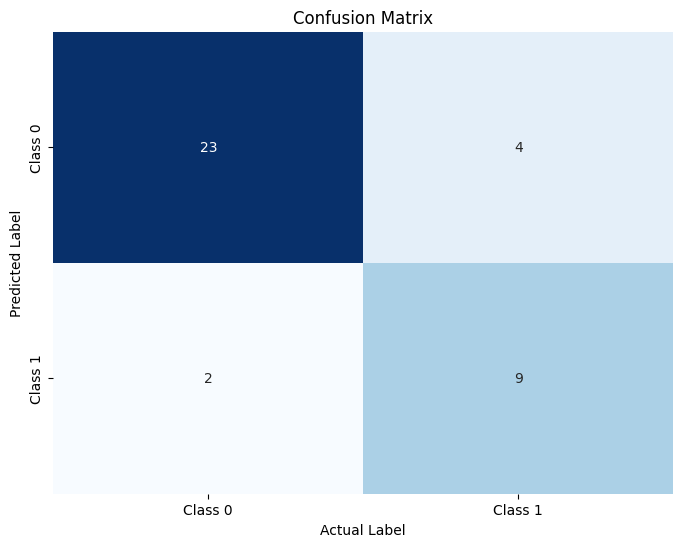

In [39]:
#Confusion Matrix for the best classifier:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_bpnn)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label')
plt.show()

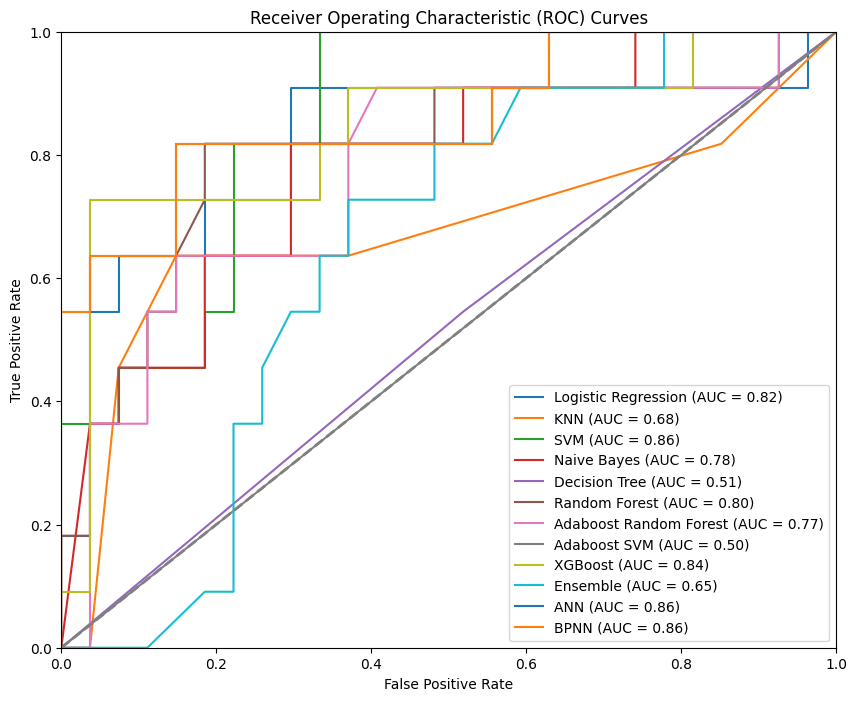

In [42]:
#The ROC curves obtained by different classifiers:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# List of classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Adaboost Random Forest': AdaBoostClassifier(estimator=RandomForestClassifier(), n_estimators=50, random_state=42),
    'Adaboost SVM': AdaBoostClassifier(estimator=SVC(probability=True), n_estimators=50, algorithm='SAMME', random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'Ensemble': StackingClassifier(estimators=[
        ('svm', SVC(probability=True)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('nb', GaussianNB())
    ], final_estimator=RandomForestClassifier(random_state=42), stack_method='auto'),
    'ANN': MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=10000, random_state=42),
    'BPNN': MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=10000, random_state=42),
}

# Plot ROC curves for each classifier
plt.figure(figsize=(10, 8))

for name, clf in classifiers.items():
    clf.fit(X_train_scaled, y_train)
    y_score = clf.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)  # Random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')
plt.show()


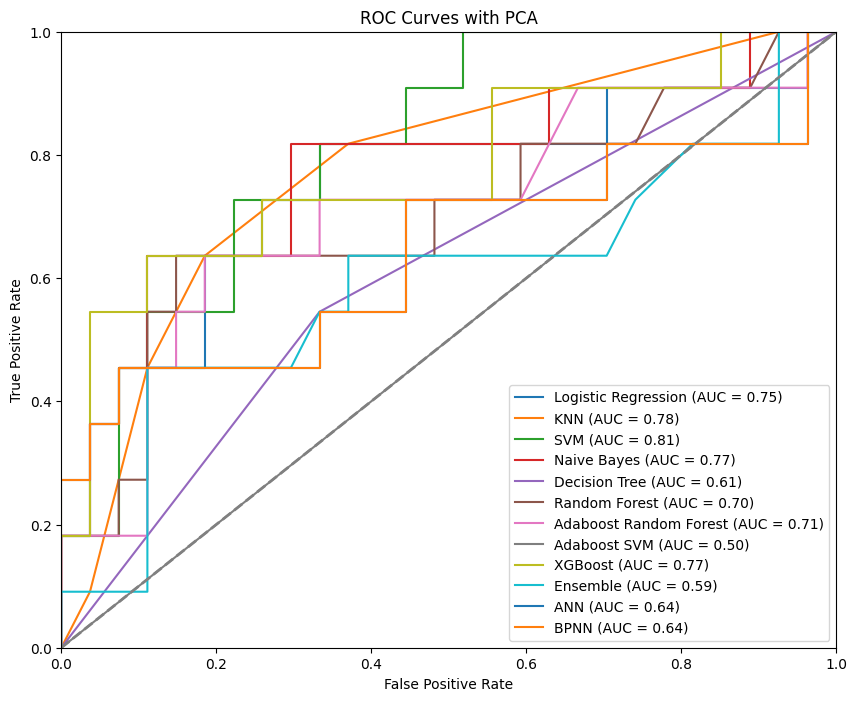

In [43]:
#The ROC curves obtained by different classifiers with PCA:

plt.figure(figsize=(10, 8))
for name, clf in classifiers.items():
    clf.fit(X_train_pca, y_train)
    y_score = clf.predict_proba(X_test_pca)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', linewidth=2)  # Random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves with PCA')
plt.legend(loc='lower right')
plt.show()